In [1]:
import pandas as pd

In [2]:
features = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,5-Feb-14,5.73,2.572,211.096358,8.106,False
1,2,5-Feb-14,4.55,2.572,210.752605,8.324,False
2,3,5-Feb-14,7.62,2.572,214.424881,7.368,False
3,4,5-Feb-14,6.53,2.598,126.442065,8.623,False
4,5,5-Feb-14,4.28,2.572,211.653972,6.566,False


In [4]:
print train.shape
train.head()

(344667, 5)


,Store,Dept,Date,Sales,IsHoliday
0,1,1,5-Feb-14,24924.50,False
1,1,2,5-Feb-14,50605.27,False
2,1,3,5-Feb-14,13740.12,False
3,1,4,5-Feb-14,39954.04,False
4,1,5,5-Feb-14,32229.38,False


In [5]:
test.IsHoliday = test.IsHoliday.astype(int)
test = test.drop('SalesForecast' , axis = 1)
print test.shape
test.head()

(153805, 4)


,Store,Dept,Date,IsHoliday
0,1,1,4-May-16,0
1,1,2,4-May-16,0
2,1,3,4-May-16,0
3,1,4,4-May-16,0
4,1,5,4-May-16,0


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df = pd.merge(train ,features, on=('Store', 'Date' , 'IsHoliday'))
test = pd.merge(test ,features, on=('Store', 'Date' , 'IsHoliday'))
df.IsHoliday = df.IsHoliday.astype(int)
df.head()

,Store,Dept,Date,Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,5-Feb-14,24924.50,0,5.73,2.572,211.096358,8.106
1,1,2,5-Feb-14,50605.27,0,5.73,2.572,211.096358,8.106
2,1,3,5-Feb-14,13740.12,0,5.73,2.572,211.096358,8.106
3,1,4,5-Feb-14,39954.04,0,5.73,2.572,211.096358,8.106
4,1,5,5-Feb-14,32229.38,0,5.73,2.572,211.096358,8.106


In [8]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)
test['Date'] = pd.to_datetime(test['Date'])
test['Date']= test['Date'].map(dt.datetime.toordinal)
df.head()

,Store,Dept,Date,Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,735269,24924.50,0,5.73,2.572,211.096358,8.106
1,1,2,735269,50605.27,0,5.73,2.572,211.096358,8.106
2,1,3,735269,13740.12,0,5.73,2.572,211.096358,8.106
3,1,4,735269,39954.04,0,5.73,2.572,211.096358,8.106
4,1,5,735269,32229.38,0,5.73,2.572,211.096358,8.106


In [9]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,736088,0,24.19,3.749,221.6718,7.143
1,1,2,736088,0,24.19,3.749,221.6718,7.143
2,1,3,736088,0,24.19,3.749,221.6718,7.143
3,1,4,736088,0,24.19,3.749,221.6718,7.143
4,1,5,736088,0,24.19,3.749,221.6718,7.143


In [10]:
from sklearn import preprocessing
from sklearn import utils
import numpy as np
y = np.asarray(df['Sales'], dtype=float)
df = df.drop('Sales' , axis = 1)
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,735269,0,5.73,2.572,211.096358,8.106
1,1,2,735269,0,5.73,2.572,211.096358,8.106
2,1,3,735269,0,5.73,2.572,211.096358,8.106
3,1,4,735269,0,5.73,2.572,211.096358,8.106
4,1,5,735269,0,5.73,2.572,211.096358,8.106


In [11]:
test.IsHoliday = test.IsHoliday.astype(int)
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,736088,0,24.19,3.749,221.6718,7.143
1,1,2,736088,0,24.19,3.749,221.6718,7.143
2,1,3,736088,0,24.19,3.749,221.6718,7.143
3,1,4,736088,0,24.19,3.749,221.6718,7.143
4,1,5,736088,0,24.19,3.749,221.6718,7.143


In [12]:
df.shape

(344667, 8)

In [13]:
from sklearn.linear_model import LogisticRegression , SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,735269,0,5.73,2.572,211.096358,8.106
1,1,2,735269,0,5.73,2.572,211.096358,8.106
2,1,3,735269,0,5.73,2.572,211.096358,8.106
3,1,4,735269,0,5.73,2.572,211.096358,8.106
4,1,5,735269,0,5.73,2.572,211.096358,8.106


In [14]:
train_f = pd.merge(df ,stores, on=('Store'))
test_f  = pd.merge(test ,stores, on=('Store'))

In [15]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = StandardScaler()#MinMaxScaler()
train_f.Type = [sum(ord(i) for i in j) for j in list(train_f['Type'])]
col_tr =  list(train_f)
train_f[['Temperature' , 'Fuel_Price' , 'CPI', 'Unemployment', 'Size']] = scaler.fit_transform(train_f[['Temperature' , 'Fuel_Price' , 'CPI', 'Unemployment' , 'Size']])
train_f['Type'] = [i % 65 for i in train_f['Type']]
train_f = train_f.drop('Date' , axis = 1)

In [16]:
train_f.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,0,-0.808649,-1.555097,1.053365,-0.007458,0,0.238049
1,1,2,0,-0.808649,-1.555097,1.053365,-0.007458,0,0.238049
2,1,3,0,-0.808649,-1.555097,1.053365,-0.007458,0,0.238049
3,1,4,0,-0.808649,-1.555097,1.053365,-0.007458,0,0.238049
4,1,5,0,-0.808649,-1.555097,1.053365,-0.007458,0,0.238049


In [17]:
test_f.Type = [sum(ord(i) for i in j) for j in list(test_f['Type'])]
print test_f.shape
col_tr =  list(test_f)
test_f[['Temperature' , 'Fuel_Price' , 'CPI', 'Unemployment' , 'Size']] = scaler.fit_transform(test_f[['Temperature' , 'Fuel_Price' , 'CPI', 'Unemployment' , 'Size']])
test_f = pd.DataFrame(test_f , columns=col_tr)
test_f = test_f.drop('Date' , axis = 1)
test_f['Type'] = [i % 65 for i in test_f['Type']]
test_f.head()

(153805, 10)


,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,0,0.908808,0.378673,1.111177,0.052479,0,0.244038
1,1,2,0,0.908808,0.378673,1.111177,0.052479,0,0.244038
2,1,3,0,0.908808,0.378673,1.111177,0.052479,0,0.244038
3,1,4,0,0.908808,0.378673,1.111177,0.052479,0,0.244038
4,1,5,0,0.908808,0.378673,1.111177,0.052479,0,0.244038


In [54]:
model = SGDRegressor()
model.fit(X=train_f , y=y)
Pred = model.predict(X=test_f)

In [55]:
submission = pd.read_csv('test.csv')
print submission.shape

(153805, 5)


In [56]:
Pred.shape

(153805L,)

In [57]:
submission.SalesForecast =  ['%.2f' % elem for elem in list(Pred)]

In [58]:
submission.head()

,Store,Dept,Date,IsHoliday,SalesForecast
0,1,1,4-May-16,False,16066.63
1,1,2,4-May-16,False,15958.29
2,1,3,4-May-16,False,15849.95
3,1,4,4-May-16,False,15741.61
4,1,5,4-May-16,False,15633.27


In [59]:
submission.to_csv('submission.csv')

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
print y
l = [0 if i > 0 else i for i in y]

[ 24924.5   50605.27  13740.12 ...,  50693.76   6579.76    619.41]


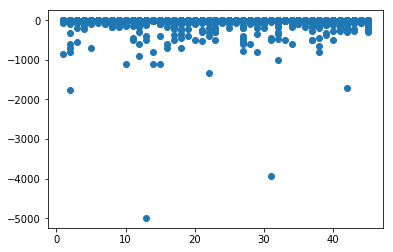

In [62]:
##Loss in train dataset
fig, ax = plt.subplots()
ax.scatter(train_f['Store'],l)

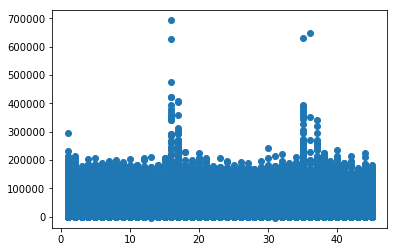

In [63]:
##sales in train set

fig, ax = plt.subplots()
ax.scatter(train_f['Store'],y)

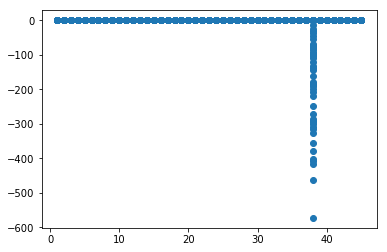

In [64]:
##Loss in test dataset
fig, ax = plt.subplots()
l = [0 if i > 0 else i for i in Pred]
ax.scatter(test_f['Store'],l)

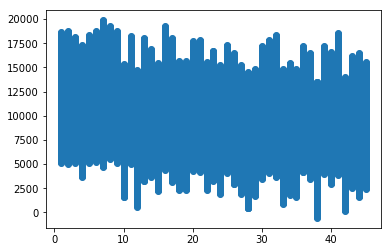

In [65]:
##predictions of sales in test
fig, ax = plt.subplots()
ax.scatter(test_f['Store'],Pred)